In [98]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [99]:
# reading tables
ac_details = pd.read_excel('Data Science Case study Vindiata.xls', sheet_name=1, 
                           header=3, index_col=0,usecols='B:F')
ac_details.sample(5)

,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour
Aircraft Type,,,,
A320,5000,800,150,5000
ATR72,1000,650,75,2750
B737,5000,800,150,5100
Q400,1500,750,90,3500
A330,8000,900,250,7500


In [100]:
operations = pd.read_excel('Data Science Case study Vindiata.xls', sheet_name=2, skiprows=3, usecols='B:O')
operations.sample(5)

,Aircraft Name,Aircraft Type,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00
24,Y,A330,300,301,298,303,293,295,298,296,306,306,301,302
17,R,ATR72,200,201,198,203,193,195,198,196,206,206,201,202
14,O,A320,250,251,248,253,243,245,248,246,256,256,251,252
10,K,B737,250,251,248,253,243,245,248,246,256,256,251,252
25,Z,B737,245,246,243,248,238,240,243,241,251,251,246,247


In [101]:
city_pairs = pd.read_excel('Data Science Case study Vindiata.xls', sheet_name=3, header=3, usecols='B:E')
city_pairs.sample(4)

,Origin City,Desitnation City,Pass. Demand \n(per day),Distance (km)
3,AA,DD,300,1000
2,CC,AA,300,400
1,BB,CC,450,6500
0,AA,BB,420,3000


In [102]:
# renaming ac_detail columns
ac_details.rename(columns = {'Costs per flight hour':r'Costs per flight hour (USD)'}, inplace = True)

In [103]:
ac_details.head()

,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour (USD)
Aircraft Type,,,,
A320,5000,800,150,5000
A330,8000,900,250,7500
B737,5000,800,150,5100
B747,10000,900,350,12000
Q400,1500,750,90,3500


In [104]:
# modifying column labels of operations DF and setting appropriate index

# separating date column labels and converting into list
date_lab = operations.columns.astype(object).tolist()[2:]

# converting the date column labels into specified format
date_list = [datetime.strftime(col,'%b-%y') for col in date_lab]

# final date column label
operations.columns = ['Aircraft Name', 'Aircraft Type'] + date_list

In [105]:
# creating multilevel column
operations.set_index(['Aircraft Name', 'Aircraft Type'], inplace=True) 
columns = [('Hours flown', 'Jan-14'), ('Hours flown', 'Feb-14'), 
            ('Hours flown','Mar-14'), ('Hours flown', 'Apr-14'),
           ('Hours flown', 'May-14'), ('Hours flown', 'Jun-14'),
           ('Hours flown', 'Jul-14'), ('Hours flown','Aug-14'),
           ('Hours flown','Sep-14'), ('Hours flown','Oct-14'),
           ('Hours flown','Nov-14'), ('Hours flown','Dec-14')]
operations.columns = pd.MultiIndex.from_tuples(columns)

In [106]:
operations.reset_index(inplace=True)

In [107]:
operations.head()

Aircraft Name Aircraft Type Hours flown                                     \
                                   Jan-14 Feb-14 Mar-14 Apr-14 May-14 Jun-14   
0            A           A320         250    251    248    253    243    245   
1             B          A330         300    301    298    303    293    295   
2             C          B737         245    246    243    248    238    240   
3             D          B747         310    311    308    313    303    305   
4             E          Q400         200    201    198    203    193    195   

                                             
  Jul-14 Aug-14 Sep-14 Oct-14 Nov-14 Dec-14  
0    248    246    256    256    251    252  
1    298    296    306    306    301    302  
2    243    241    251    251    246    247  
3    308    306    316    316    311    312  
4    198    196    206    206    201    202

In [108]:
# renaming column label of city_pair DF
city_pairs.rename(columns={'Pass. Demand \n(per day)': 'Pass. Demand (per day)'}, inplace=True)

In [109]:
city_pairs.head()

,Origin City,Desitnation City,Pass. Demand (per day),Distance (km)
0,AA,BB,420,3000
1,BB,CC,450,6500
2,CC,AA,300,400
3,AA,DD,300,1000


## Airline - A

### Q1: Total cost by the aircraft type for the year

In [110]:
# Total hours flown
hours_flown = operations.sort_index(axis=1).groupby('Aircraft Type').sum().sum(axis=1)

In [111]:
hours_flown

Aircraft Type
A320     14875
A330     21834
ATR72     9536
B737     11816
B747     11037
Q400      9476
dtype: int64

In [112]:
total_cost = (hours_flown * ac_details.loc[:,'Costs per flight hour (USD)']).sort_values(ascending=False)

In [113]:
total_cost

Aircraft Type
A330     163755000
B747     132444000
A320      74375000
B737      60261600
Q400      33166000
ATR72     26224000
dtype: int64

### Q2: Aircraft with lowest cost per seat per km flown

In [114]:
# calculating total distance travelled by the aircraft
total_distance = hours_flown * ac_details['Ave. Speed (km/h)']

In [115]:
total_distance

Aircraft Type
A320     11900000
A330     19650600
ATR72     6198400
B737      9452800
B747      9933300
Q400      7107000
dtype: int64

In [116]:
# calculating costs per seat per km
cost_seat_km = (total_cost / ac_details['Number of Seats']) / total_distance

In [117]:
cost_seat_km

Aircraft Type
A320     0.041667
A330     0.033333
ATR72    0.056410
B737     0.042500
B747     0.038095
Q400     0.051852
dtype: float64

In [118]:
# aircraft with lowest cost per seat per km flown
ac_lowest_rate = cost_seat_km.sort_values().index[0]

In [119]:
ac_lowest_rate

'A330'

A330 has lowest cost per seat per km.

## Airline - B

### Q1: Ideal combination of flight type for each city-pairs

In [120]:
# defining a function to calculate total cost incurred by an aircraft to operate between two cities
def operating_cost(k):
    
    # creating a list of aircrafts that has enough range to operate between two cities
    ac_ind = [ ac_details.index[i] for i in range(ac_details.index.size) \
              if ac_details.iloc[i,0] >= city_pairs.loc[k,'Distance (km)']]
    
    # calculating number of trips to be made by eligible aircrafts
    ntrip = [np.ceil(city_pairs.at[k,'Pass. Demand (per day)'] / ac_details.at[aircraft,'Number of Seats']) \
             .astype(int) for aircraft in ac_ind]
    
    # calculating operating cost for eligible aircrafts assuming availability of multiple aircrafts of each type
    oper_cost = [ac_details.at[ac_ind[i],'Costs per flight hour (USD)'] * ((ntrip[i] * city_pairs.at[k,'Distance (km)']) /
                              ac_details.at[ac_ind[i],'Ave. Speed (km/h)']) for i in range(len(ac_ind))]
    
    # creating a DataFrame with operating costs of all eligible aircraft
    df_cost = pd.DataFrame(list(zip(ac_ind, ntrip, oper_cost)), \
                           columns=['Aircraft Type', 'Number of Trips', 'Operating Cost'])
    
    return df_cost.sort_values(by='Operating Cost').reset_index(drop=True)

In [121]:
ideal_combo = pd.Series({city_pairs.iat[i,0] + '-' + city_pairs.iat[i,1]: operating_cost(i).at[0,'Aircraft Type'] 
               for i in range(city_pairs.index.size)},name='Choice of Aircraft')

In [122]:
ideal_combo

AA-BB    A330
BB-CC    A330
CC-AA    A320
AA-DD    A320
Name: Choice of Aircraft, dtype: object

## Report

### Airline A

In [123]:
operations.head()

Aircraft Name Aircraft Type Hours flown                                     \
                                   Jan-14 Feb-14 Mar-14 Apr-14 May-14 Jun-14   
0            A           A320         250    251    248    253    243    245   
1             B          A330         300    301    298    303    293    295   
2             C          B737         245    246    243    248    238    240   
3             D          B747         310    311    308    313    303    305   
4             E          Q400         200    201    198    203    193    195   

                                             
  Jul-14 Aug-14 Sep-14 Oct-14 Nov-14 Dec-14  
0    248    246    256    256    251    252  
1    298    296    306    306    301    302  
2    243    241    251    251    246    247  
3    308    306    316    316    311    312  
4    198    196    206    206    201    202

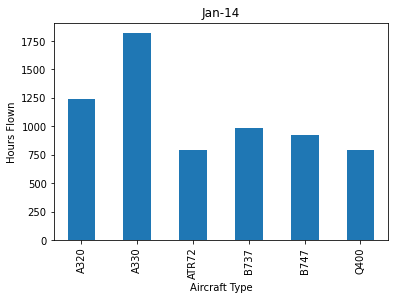

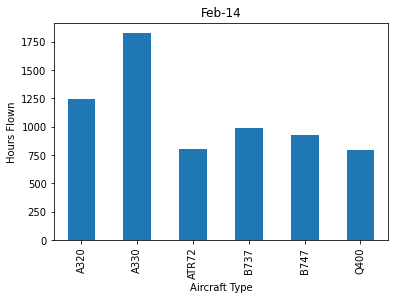

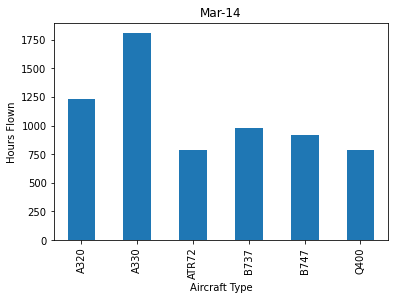

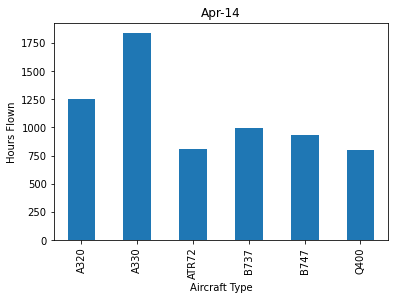

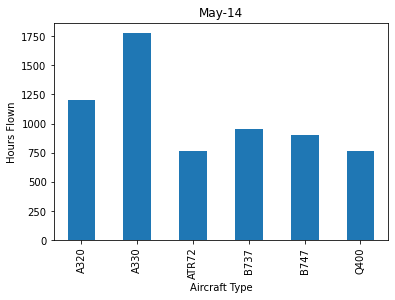

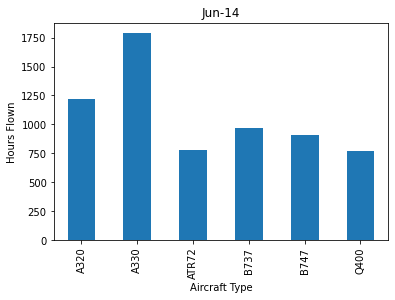

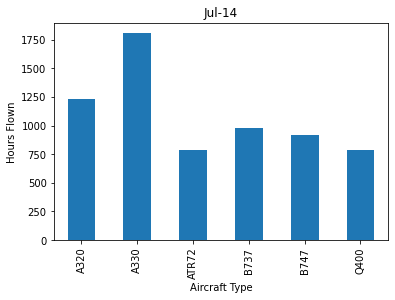

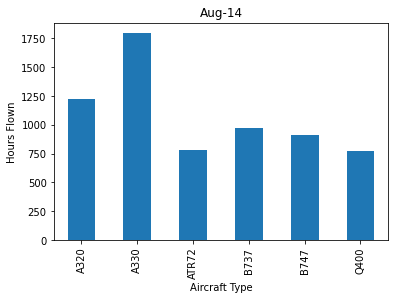

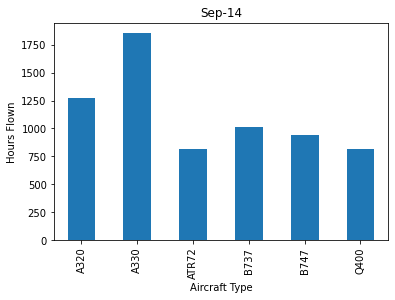

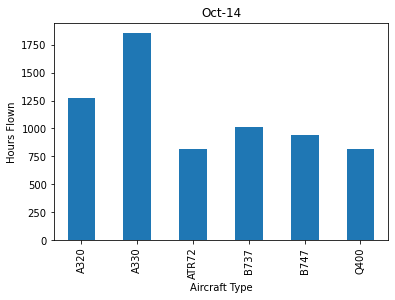

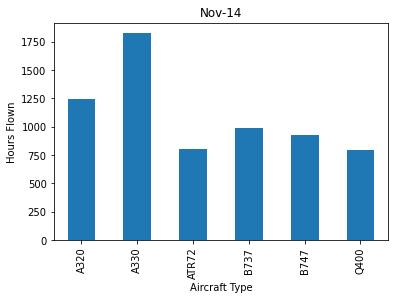

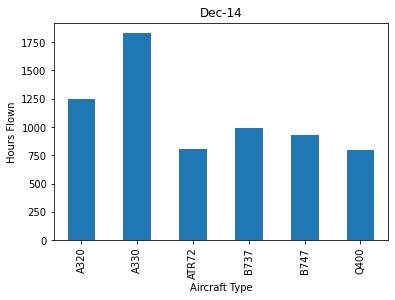

In [124]:
months = operations['Hours flown'].columns
for month in months:
    operations.groupby('Aircraft Type').sum()[('Hours flown', month)].plot(kind='bar', ylabel='Hours Flown', title=month)
    plt.show()

Comment 1: A330 has the been flown for maximum hours followed by A320 while ATR72 and Q400 has been used the least.

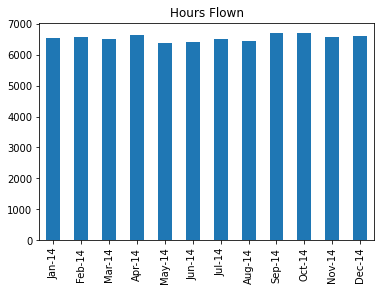

In [125]:
hr_flown = operations.sort_index(axis=1).groupby('Aircraft Type').sum().sum()
fig = operations.groupby('Aircraft Type').sum().droplevel(0, axis=1).sum().plot(kind='bar', title='Hours Flown', legend=False)

Comment 2: Airline A has maintained almost consistent flight time throughout the year.

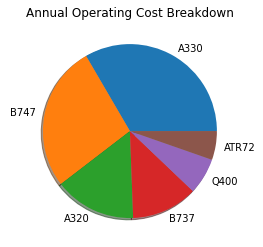

In [126]:
total_cost.name = 'Operating Cost'
fig = total_cost.plot(kind='pie', title='Annual Operating Cost Breakdown', ylabel = ' ', shadow=True)

Comment 3: Flight type A330 has the highest annual operating cost while ATR72 has the least operating cost.

Comment 4: Flight type A330 and B747 makes up for more than 50% of the total operating cost for Airline A.

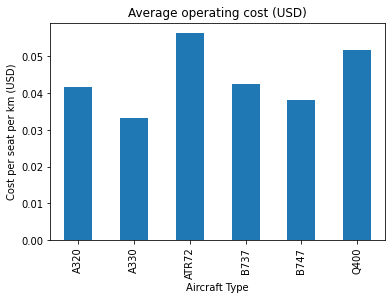

In [127]:
cost_seat_km.name = 'Cost per seat per km'
fig = cost_seat_km.plot(kind='bar', ylabel='Cost per seat per km (USD)', title='Average operating cost (USD)')

Comment 5: For airline A, flight type A330 has the lowest operating cost per seat per km while ATR72 has the highest operating cost per seat per km.

### Part B

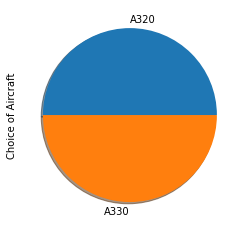

In [128]:
fig = ideal_combo.value_counts().plot(kind='pie', shadow=True)

Comment 1: Only A320 and A330 should be used by Airline B to achieve lowest opearting cost.

Comment 2: For route CC-AA and AA-DD use A320.

Comment 3: For route AA-BB and BB-CC use A330.